# Kaggle Spaceship Titanic
## Model - Classifier
### 데이터 셋
[Kaggle Spaceship Titanic](https://www.kaggle.com/competitions/spaceship-titanic/data)

### 사용 라이브러리 

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib
import random
import glob

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

import xgboost as xgb
from xgboost import XGBClassifier
import lightgbm as lgbm
from lightgbm import LGBMClassifier

import warnings
warnings.filterwarnings("ignore")

### Data Load

In [3]:
path = glob.glob("data/*")
path

['data\\pre_test.csv',
 'data\\pre_train.csv',
 'data\\sample_submission.csv',
 'data\\test.csv',
 'data\\train.csv']

In [4]:
train = pd.read_csv(path[1])
test = pd.read_csv(path[0])
sub = pd.read_csv(path[2])

train.shape, test.shape, sub.shape

((8693, 10), (4277, 9), (4277, 2))

### 인코딩

In [5]:
display(train.dtypes)
display(test.dtypes)

HomePlanet     object
CryoSleep        bool
Destination    object
VIP              bool
Transported      bool
ggg             int64
Deck           object
Side           object
Band_Age       object
Service          bool
dtype: object

HomePlanet     object
CryoSleep        bool
Destination    object
VIP              bool
ggg             int64
Deck           object
Side           object
Band_Age       object
Service          bool
dtype: object

In [6]:
encode_list = train.columns.tolist()
encode_list.remove("Transported")
encode_list.remove("ggg")
encode_list.remove("CryoSleep")
encode_list.remove("VIP")
encode_list.remove("Service")
encode_list

['HomePlanet', 'Destination', 'Deck', 'Side', 'Band_Age']

In [7]:
temp_train, temp_test = [], []

for col in encode_list:
    temp_train.append(pd.get_dummies(train[col], drop_first=True))
    temp_test.append(pd.get_dummies(test[col], drop_first=True))
    
temp_train = pd.concat(temp_train, axis=1)
temp_test = pd.concat(temp_test, axis=1)

In [8]:
train = pd.concat([train.drop(columns=encode_list, axis=1), temp_train], axis=1)
test = pd.concat([test.drop(columns=encode_list, axis=1), temp_test], axis=1)

In [9]:
train.shape, test.shape

((8693, 20), (4277, 19))

### Train

In [10]:
label = "Transported"
features = test.columns.tolist()

In [12]:
X_train, X_test, y_train, y_test = train_test_split(train[features], train[label], test_size=0.2, stratify=train[label])

print(f"X_train: {X_train.shape}\ny_train: {y_train.shape}\nX_test: {X_test.shape}\ny_test: {y_test.shape}")

X_train: (6954, 19)
y_train: (6954,)
X_test: (1739, 19)
y_test: (1739,)


#### Random Forest

In [13]:
clf_rf = RandomForestClassifier()

pred_rf = clf_rf.fit(X_train, y_train).predict(X_test)

accuracy_score(y_test, pred_rf)

0.7199539965497412

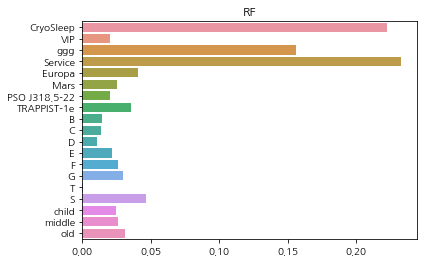

In [15]:
_ = sns.barplot(x=clf_rf.feature_importances_, y=features).set_title("RF")

#### XGBoost

In [16]:
clf_xgb = XGBClassifier()

pred_xgb = clf_xgb.fit(X_train, y_train).predict(X_test)

accuracy_score(y_test, pred_rf)

[03:13:38] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.7199539965497412

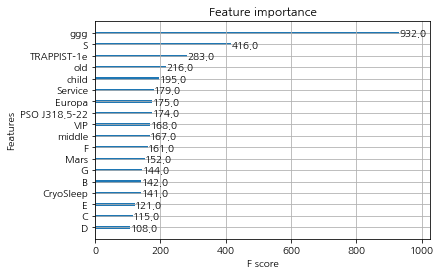

In [18]:
_ = xgb.plot_importance(clf_xgb)

#### LGBM

In [19]:
clf_lgbm = LGBMClassifier()

pred_lgbm = clf_lgbm.fit(X_train, y_train).predict(X_test)

accuracy_score(y_test, pred_lgbm)

0.7527314548591144

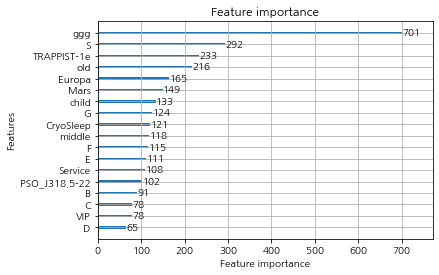

In [20]:
_ = lgbm.plot_importance(clf_lgbm)